# California Crime Analysis (R)
### Dataset Description
This project uses the “California Crime and Law Enforcement” dataset (2015) from Kaggle. It includes crime statistics by city and county in California (e.g., violent and property crimes) as well as corresponding law enforcement employee numbers. The dataset enables analysis of crime distribution, officer-to-population ratios, outlier detection, and exploratory modeling.


In [ ]:
#Libraries
library(readr)
#Package for skewness and kurtosis
install.packages("e1071") 
library(e1071) 
#Packages for correlation and NB method
install.packages("caret")
library(caret)
install.packages("corrplot")
library(corrplot)
#Package for function left_join
install.packages("tidyverse")
library(tidyverse)
#Package for spatial data of counties of California, download the map of the counties of California.
install.packages("tigris")
library(tigris)
#Basic package for spatial data
install.packages("sf")
library(sf)
#Package to draw the map
install.packages("ggplot2")
library(ggplot2)
install.packages("caTools")
library(caTools)

In [33]:
#Load ca_law_enforcement_by_city.csv,provide information about the police force in each city
law_city <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_law_enforcement_by_city.csv")
head(law_city)

,City,Population,Total.law.enforcement.employees,Total..officers,Total..civilians
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alameda,"78,613",112,83,29
2,Albany,"19,723",30,23,7
3,Alhambra,"86,175",128,85,43
4,Alturas,"2,566",6,5,1
5,Anaheim,"349,471",577,399,178
6,Anderson,"10,277",24,18,6


In [35]:
#Load ca_law_enforcement_by_city.csv ,provide information about the police force in each county.
law_county <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_law_enforcement_by_county.csv")
head(law_county)

,Metropolitan.Nonmetropolitan,County,Total.law.enforcement.employees,Total.officers,Total.civilians
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Metropolitan Counties,Alameda,"1,560",978,582
2,Metropolitan Counties,Butte,288,101,187
3,Metropolitan Counties,Contra Costa,936,610,326
4,Metropolitan Counties,El Dorado,349,164,185
5,Metropolitan Counties,Fresno,"1,043",406,637
6,Metropolitan Counties,Imperial,283,190,93


In [37]:
#Load ca_offenses_by_city.csv,provide information about recorded crimes in California classified by city.
offenses_city <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_offenses_by_city.csv")
head(offenses_city)

,City,Population,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Rape..legacy.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Adelanto,"33,005",212,2,14,NA,48,148,808,434,254,120,24
2,Agoura Hills,"20,970",15,0,1,NA,6,8,310,82,217,11,0
3,Alameda,"78,613",148,2,7,NA,61,78,"1,819",228,"1,245",346,18
4,Albany,"19,723",34,1,6,NA,16,11,605,95,447,63,0
5,Alhambra3,"86,175",168,1,13,NA,74,80,"1,929",305,"1,413",211,6
6,Aliso Viejo,"50,751",32,0,5,NA,3,24,363,53,276,34,1


In [39]:
#Preprocessing ca_offenses_by_county.csv data set
#To delete those lines later
offenses_county <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_offenses_by_county.csv",na.strings = c("", " ", "NA"))
head(offenses_county)

,Metropolitan.Nonmetropolitan,County,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Rape.legacy.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Metropolitan Counties,Alameda,510,6,13,NA,177,314,"2,077",463,985,629,11
2,Metropolitan Counties,Butte3,155,4,20,NA,14,117,"1,422",708,693,21,0
3,Metropolitan Counties,Contra Costa,426,14,24,NA,153,235,"2,013",660,"1,332",21,18
4,Metropolitan Counties,El Dorado3,252,9,46,NA,32,165,"2,031",577,"1,412",42,4
5,Metropolitan Counties,Fresno,962,8,32,NA,112,810,"3,810","1,398","1,838",574,145
6,Metropolitan Counties,Imperial3,219,0,6,NA,7,206,625,202,395,28,21


# Preprocessing ca_law_enforcement_by_city.csv

In [42]:
#Preprocessing ca_law_enforcement_by_city.csv
#Population attribute changed from character to numeric type
str(law_city$Population)
law_city$Population <- as.numeric(gsub(",", "", law_city$Population))


 chr [1:333] "78,613" "19,723" "86,175" "2,566" "349,471" "10,277" ...


In [44]:
str(law_city$Total.law.enforcement.employees)
law_city$Total.law.enforcement.employees <- as.numeric(gsub(",","",law_city$Total.law.enforcement.employees))
str(law_city$Total..officers)
law_city$Total..officers <- as.numeric(gsub(",","",law_city$Total..officers))
str(law_city$Total..civilians)
law_city$Total..civilians <- as.numeric(gsub(",","",law_city$Total..civilians))
str(law_city)

 chr [1:333] "112" "30" "128" "6" "577" "24" "115" "93" "35" "27" "29" "37" ...
 chr [1:333] "83" "23" "85" "5" "399" "18" "91" "68" "25" "23" "22" "27" ...
 chr [1:333] "29" "7" "43" "1" "178" "6" "24" "25" "10" "4" "7" "10" "7" ...
'data.frame':	333 obs. of  5 variables:
 $ City                           : chr  "Alameda" "Albany" "Alhambra" "Alturas" ...
 $ Population                     : num  78613 19723 86175 2566 349471 ...
 $ Total.law.enforcement.employees: num  112 30 128 6 577 24 115 93 35 27 ...
 $ Total..officers                : num  83 23 85 5 399 18 91 68 25 23 ...
 $ Total..civilians               : num  29 7 43 1 178 6 24 25 10 4 ...


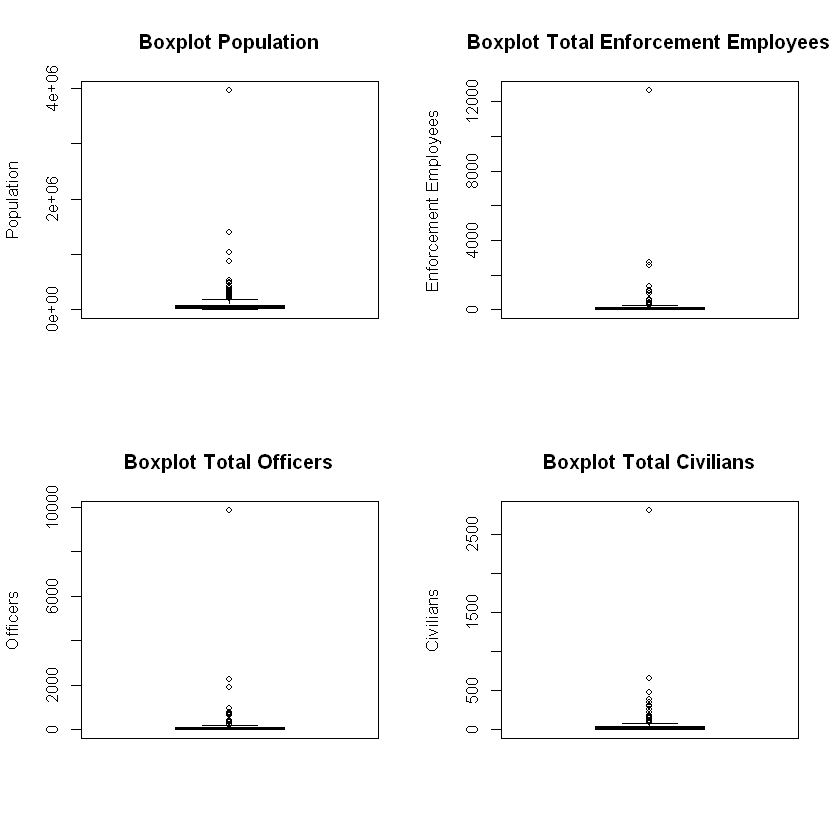

In [46]:
#Boxplot to check for outliers in ca_law_enforcement_by_city.csv
par(mfrow = c(2,2))
boxplot(law_city$Population, main = "Boxplot Population",ylab = "Population")
boxplot(law_city$Total.law.enforcement.employees, main = "Boxplot Total Enforcement Employees",ylab = "Enforcement Employees")
boxplot(law_city$Total..officers, main = "Boxplot Total Officers",ylab = "Officers")
boxplot(law_city$Total..civilians, main = "Boxplot Total Civilians",ylab = "Civilians")

In [48]:
#For Population Attribute
#22 outliers
length(boxplot.stats(law_city$Population)$out)
boxplot.stats(law_city$Population)$out
summary(law_city$Population)

[1] 22

[1]  349471  373887  265215  206982  232427  520837  202298  203233  258198
[10]  476318 3962726  210794  419481  207221  323064  489717  216477 1400467
[19]  863782 1031458  337304  304890

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    115   11879   33619   80736   81953 3962726 

In [50]:
#For Total officers Attribute
#26 outliers
length(boxplot.stats(law_city$Total..officers)$out)
boxplot.stats(law_city$Total..officers)$out
summary(law_city$Total..officers)

[1] 26

[1]  399  388  217  702  236  210  203  771 9863  216  734  206  234  237  221
[16]  368  646  214 1887 2236  939  302  203  389  214  212

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    16.0    39.0   112.5    85.0  9863.0 

# Preprocessing ca_law_enforcement_by_county.csv

In [53]:
law_county$Total.law.enforcement.employees <- as.numeric(gsub(",", "", law_county$Total.law.enforcement.employees))
law_county$Total.officers <- as.numeric(gsub(",","",law_county$Total.officers))
law_county$Total.civilians <- as.numeric(gsub(",","",law_county$Total.civilians))
str(law_county)

'data.frame':	58 obs. of  5 variables:
 $ Metropolitan.Nonmetropolitan   : chr  "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" ...
 $ County                         : chr  "Alameda" "Butte" "Contra Costa" "El Dorado" ...
 $ Total.law.enforcement.employees: num  1560 288 936 349 1043 ...
 $ Total.officers                 : num  978 101 610 164 406 ...
 $ Total.civilians                : num  582 187 326 185 637 ...


In [55]:
#Checking missing values
colSums(is.na(law_county))

Metropolitan.Nonmetropolitan                          County 
                              0                               0 
Total.law.enforcement.employees                  Total.officers 
                              0                               0 
                Total.civilians 
                              0

# Preprocessing ca_offenses_by_city.csv

In [58]:
#Change chr type to num
offenses_city$Population <- as.numeric(gsub(",", "",offenses_city$Population))
offenses_city$Violent.crime <- as.numeric(gsub(",", "",offenses_city$Violent.crime))
offenses_city$Rape..revised.definition. <- as.numeric(gsub(",", "",offenses_city$Rape..revised.definition.))
offenses_city$Robbery <- as.numeric(gsub(",", "",offenses_city$Robbery))
offenses_city$Aggravated.assault <- as.numeric(gsub(",", "",offenses_city$Aggravated.assault))
offenses_city$Property.crime <- as.numeric(gsub(",", "",offenses_city$Property.crime))
offenses_city$Burglary <- as.numeric(gsub(",", "",offenses_city$Burglary))
offenses_city$Larceny.theft <- as.numeric(gsub(",", "",offenses_city$Larceny.theft))
offenses_city$Motor.vehicle.theft <- as.numeric(gsub(",", "",offenses_city$Motor.vehicle.theft))
offenses_city$Arson <- as.numeric(gsub(",", "",offenses_city$Arson))
str(offenses_city)

'data.frame':	460 obs. of  13 variables:
 $ City                                : chr  "Adelanto" "Agoura Hills" "Alameda" "Albany" ...
 $ Population                          : num  33005 20970 78613 19723 86175 ...
 $ Violent.crime                       : num  212 15 148 34 168 ...
 $ Murder.and.nonnegligent.manslaughter: int  2 0 2 1 1 0 0 1 18 0 ...
 $ Rape..revised.definition.           : num  14 1 7 6 13 5 13 7 129 4 ...
 $ Rape..legacy.definition.            : logi  NA NA NA NA NA NA ...
 $ Robbery                             : num  48 6 61 16 74 3 2 21 439 9 ...
 $ Aggravated.assault                  : num  148 8 78 11 80 24 20 29 685 75 ...
 $ Property.crime                      : num  808 310 1819 605 1929 ...
 $ Burglary                            : num  434 82 228 95 305 ...
 $ Larceny.theft                       : num  254 217 1245 447 1413 ...
 $ Motor.vehicle.theft                 : num  120 11 346 63 211 ...
 $ Arson                               : num  24 0 18 0 6 1 4 2

In [60]:
colSums(is.na(offenses_city))
#Rape..legacy.definition. attribute has 460 NA values, so we delete it.
offenses_city <- offenses_city[,-6]
head(offenses_city)

City                           Population 
                                   0                                    0 
                       Violent.crime Murder.and.nonnegligent.manslaughter 
                                   0                                    0 
           Rape..revised.definition.             Rape..legacy.definition. 
                                   0                                  460 
                             Robbery                   Aggravated.assault 
                                   0                                    0 
                      Property.crime                             Burglary 
                                   0                                    0 
                       Larceny.theft                  Motor.vehicle.theft 
                                   0                                    0 
                               Arson 
                                   0

,City,Population,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adelanto,33005,212,2,14,48,148,808,434,254,120,24
2,Agoura Hills,20970,15,0,1,6,8,310,82,217,11,0
3,Alameda,78613,148,2,7,61,78,1819,228,1245,346,18
4,Albany,19723,34,1,6,16,11,605,95,447,63,0
5,Alhambra3,86175,168,1,13,74,80,1929,305,1413,211,6
6,Aliso Viejo,50751,32,0,5,3,24,363,53,276,34,1


# Preprocessing ca_offenses_by_county.csv

In [145]:
#Missing Values
offenses_county <- offenses_county[rowSums(is.na(offenses_county)) < ncol(offenses_county), ]
colSums(is.na(offenses_county))

Metropolitan.Nonmetropolitan                               County 
                                   0                                    0 
                       Violent.crime Murder.and.nonnegligent.manslaughter 
                                   0                                    0 
           Rape..revised.definition.                              Robbery 
                                   0                                    0 
                  Aggravated.assault                       Property.crime 
                                   0                                    0 
                            Burglary                        Larceny.theft 
                                   0                                    0 
                 Motor.vehicle.theft                                Arson 
                                   0                                    0 
                          sum_crimes 
                                   0

In [65]:
#Rape..legacy.definition. attribute has 57 NA values
offenses_county <- offenses_county[,-6]
head(offenses_city)

,City,Population,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adelanto,33005,212,2,14,48,148,808,434,254,120,24
2,Agoura Hills,20970,15,0,1,6,8,310,82,217,11,0
3,Alameda,78613,148,2,7,61,78,1819,228,1245,346,18
4,Albany,19723,34,1,6,16,11,605,95,447,63,0
5,Alhambra3,86175,168,1,13,74,80,1929,305,1413,211,6
6,Aliso Viejo,50751,32,0,5,3,24,363,53,276,34,1


In [67]:
#chr to num
offenses_county$Violent.crime <- as.numeric(gsub(",", "",offenses_county$Violent.crime))
offenses_county$Murder.and.nonnegligent.manslaughter <- as.numeric(gsub(",", "",offenses_county$Violent.crime))
offenses_county$Rape..revised.definition. <- as.numeric(gsub(",", "",offenses_county$Rape..revised.definition.))
offenses_county$Robbery <- as.numeric(gsub(",", "",offenses_county$Robbery))
offenses_county$Aggravated.assault <- as.numeric(gsub(",", "",offenses_county$Aggravated.assault))
offenses_county$Property.crime <- as.numeric(gsub(",", "",offenses_county$Property.crime))
offenses_county$Burglary <- as.numeric(gsub(",", "",offenses_county$Burglary))
offenses_county$Larceny.theft <- as.numeric(gsub(",", "",offenses_county$Larceny.theft))
offenses_county$Motor.vehicle.theft <- as.numeric(gsub(",", "",offenses_county$Motor.vehicle.theft))
offenses_county$Arson <- as.numeric(gsub(",", "",offenses_county$Arson))
str(offenses_county)

'data.frame':	57 obs. of  12 variables:
 $ Metropolitan.Nonmetropolitan        : chr  "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" ...
 $ County                              : chr  "Alameda" "Butte3" "Contra Costa" "El Dorado3" ...
 $ Violent.crime                       : num  510 155 426 252 962 ...
 $ Murder.and.nonnegligent.manslaughter: num  510 155 426 252 962 ...
 $ Rape..revised.definition.           : num  13 20 24 46 32 6 157 16 304 18 ...
 $ Robbery                             : num  177 14 153 32 112 ...
 $ Aggravated.assault                  : num  314 117 235 165 810 ...
 $ Property.crime                      : num  2077 1422 2013 2031 3810 ...
 $ Burglary                            : num  463 708 660 577 1398 ...
 $ Larceny.theft                       : num  985 693 1332 1412 1838 ...
 $ Motor.vehicle.theft                 : num  629 21 21 42 574 ...
 $ Arson                               : num  11 0 18 4 145 21 300 5 215

 # Distribution Type in ca_offenses_by_county.csv for Violent Crime attribute

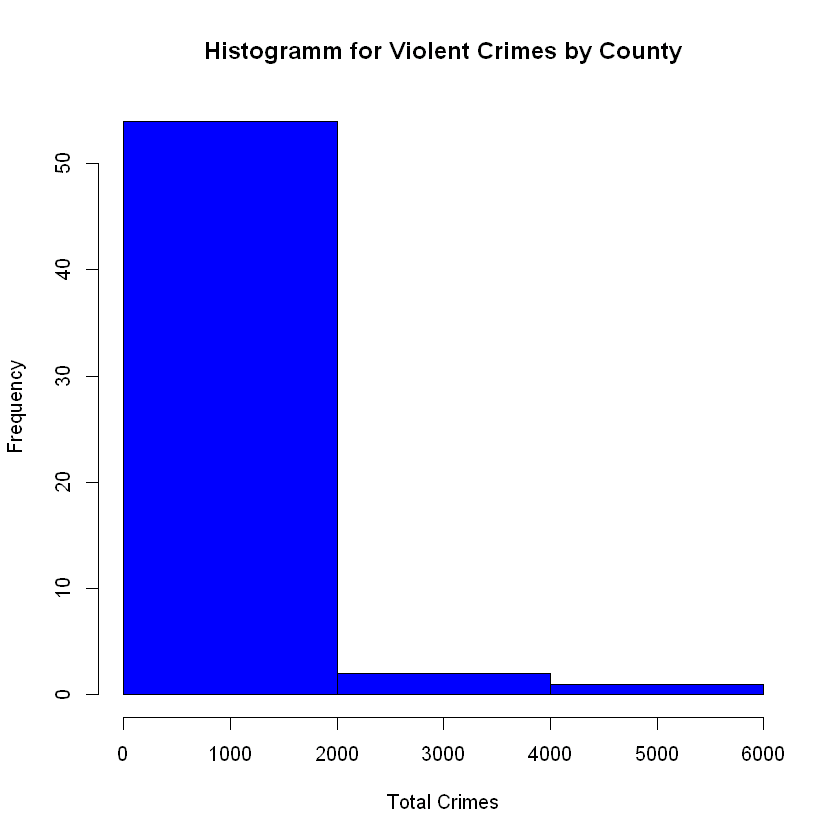

In [70]:
#Histogramm for Violent Crime by county to see Distribution Type
#positive skew
hist(offenses_county$Violent.crime, main = 'Histogramm for Violent Crimes by County',
     xlab = 'Total Crimes',ylab = 'Frequency',col = 'blue', breaks = 3)

In [72]:
#Shapiro test
#p<0.05, ΝΟΤ normal distribution
shapiro.test(offenses_county$Violent.crime)


	Shapiro-Wilk normality test

data:  offenses_county$Violent.crime
W = 0.48038, p-value = 6.621e-13


# Distribution Type in ca_offenses_by_city.csv for Population and Violent Crime attributes

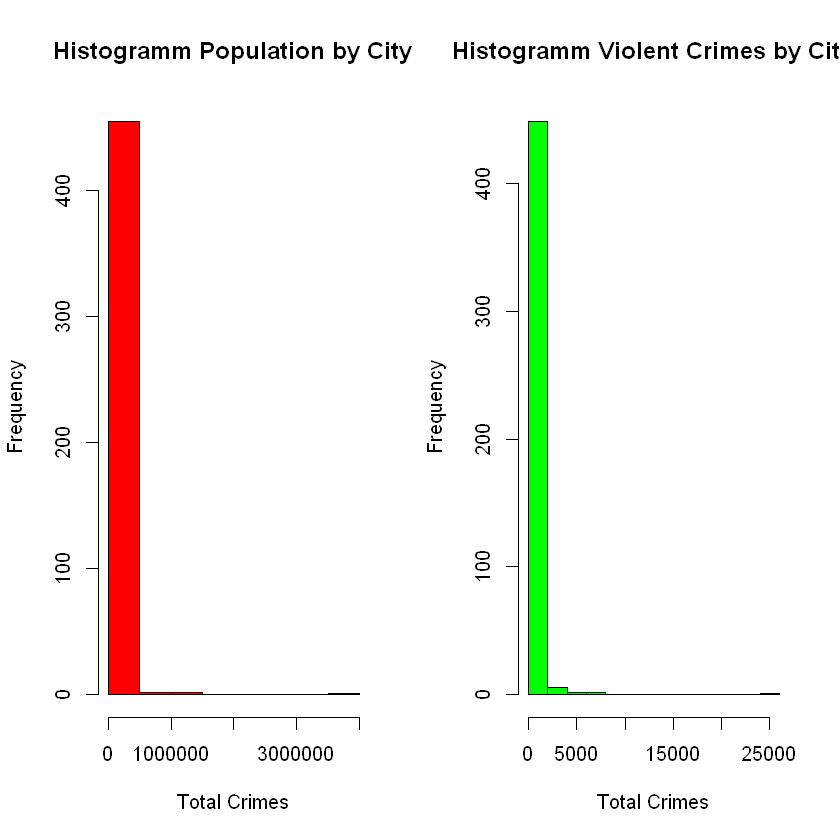

In [153]:
#Histogramm for Population and Violent Crime attributes
par(mfrow = c(1,2))
options(scipen = 999)
hist(offenses_city$Population, main = 'Histogramm Population by City', 
     xlab ='Total Crimes',ylab = 'Frequency',col = 'red')
#Population attribute has positive skew.
hist(offenses_city$Violent.crime, main = 'Histogramm Violent Crimes by City',xlab = 'Total Crimes',
     ylab = 'Frequency',col='green')

# Spatial Analysis - Map displaying the distribution of crimes in California

In [82]:
#Only attributes with crimes
offenses_county$sum_crimes <- rowSums(offenses_county[,c(-1,-2)])
head(offenses_county)

,Metropolitan.Nonmetropolitan,County,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson,sum_crimes
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Metropolitan Counties,Alameda,510,510,13,177,314,2077,463,985,629,11,11378
2,Metropolitan Counties,Butte3,155,155,20,14,117,1422,708,693,21,0,6610
3,Metropolitan Counties,Contra Costa,426,426,24,153,235,2013,660,1332,21,18,10616
4,Metropolitan Counties,El Dorado3,252,252,46,32,165,2031,577,1412,42,4,9626
5,Metropolitan Counties,Fresno,962,962,32,112,810,3810,1398,1838,574,145,21286
6,Metropolitan Counties,Imperial3,219,219,6,7,206,625,202,395,28,21,3856


In [105]:
#downlaod spatial data for California 
map_CA <- counties(state = "CA", cb = TRUE, class = 'sf')
head(map_CA)

Retrieving data for the year 2024

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
12,06,079,00277304,0500000US06079,06079,San Luis Obispo,San Luis Obispo County,CA,California,06,8549140866,815650229,MULTIPOLYGON (((-121.3464 3...
13,06,081,00277305,0500000US06081,06081,San Mateo,San Mateo County,CA,California,06,1161921071,757163219,MULTIPOLYGON (((-122.5209 3...
14,06,091,00277310,0500000US06091,06091,Sierra,Sierra County,CA,California,06,2468694578,23299110,MULTIPOLYGON (((-121.0575 3...
34,06,067,00277298,0500000US06067,06067,Sacramento,Sacramento County,CA,California,06,2500063005,75323439,MULTIPOLYGON (((-121.8625 3...
36,06,107,00277318,0500000US06107,06107,Tulare,Tulare County,CA,California,06,12493843650,37260863,MULTIPOLYGON (((-119.5665 3...
37,06,069,00277299,0500000US06069,06069,San Benito,San Benito County,CA,California,06,3596591087,4719300,MULTIPOLYGON (((-121.644 36...


In [ ]:
#Join spatial data with data crimes by county
full_map <- left_join (map_CA,offenses_county, by = c("NAME" = "County"))
head(full_map)

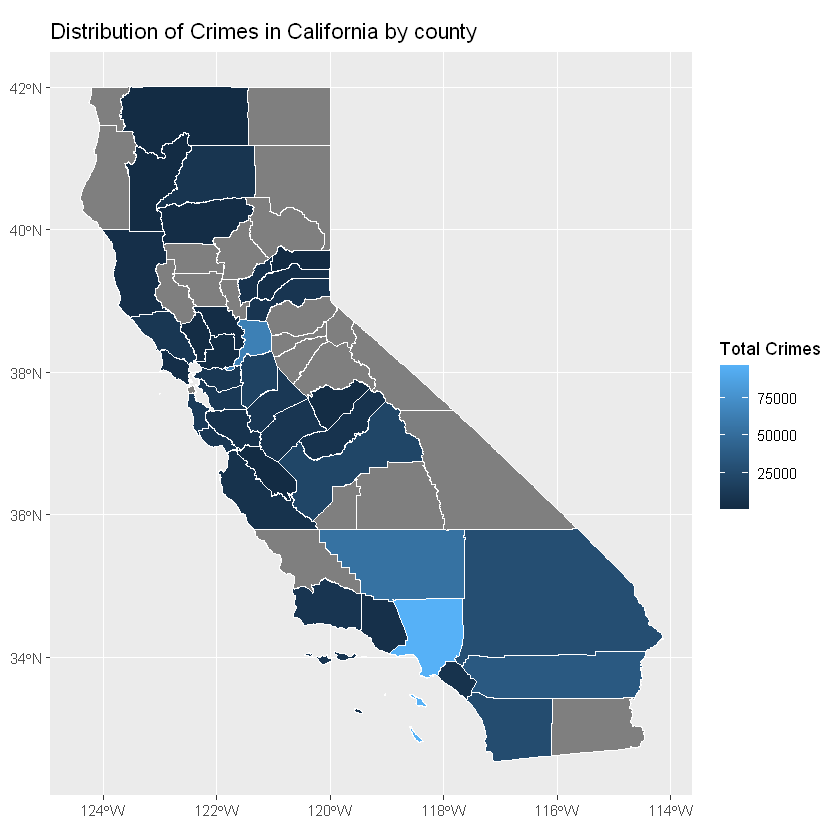

In [109]:
#Map with Distribution of crimes in California
ggplot(full_map) + geom_sf(aes(fill = sum_crimes),color = "white") + 
  labs(title = 'Distribution of Crimes in California by county', fill = 'Total Crimes')

# Bar Plot

In [111]:
total_by_crime  <- colSums(offenses_county[,c(-1,-2,-13)])
total_by_crime

Violent.crime Murder.and.nonnegligent.manslaughter 
                               24994                                24994 
           Rape..revised.definition.                              Robbery 
                                1846                                 4658 
                  Aggravated.assault                       Property.crime 
                               18113                               105500 
                            Burglary                        Larceny.theft 
                               32380                                60626 
                 Motor.vehicle.theft                                Arson 
                               12494                                 1170

In [117]:
#Data Frame creation
total_by_crime_df <- data.frame(Category = names(total_by_crime),Total = total_by_crime)
total_by_crime_df

,Category,Total
,<chr>,<dbl>
Violent.crime,Violent.crime,24994
Murder.and.nonnegligent.manslaughter,Murder.and.nonnegligent.manslaughter,24994
Rape..revised.definition.,Rape..revised.definition.,1846
Robbery,Robbery,4658
Aggravated.assault,Aggravated.assault,18113
Property.crime,Property.crime,105500
Burglary,Burglary,32380
Larceny.theft,Larceny.theft,60626
Motor.vehicle.theft,Motor.vehicle.theft,12494


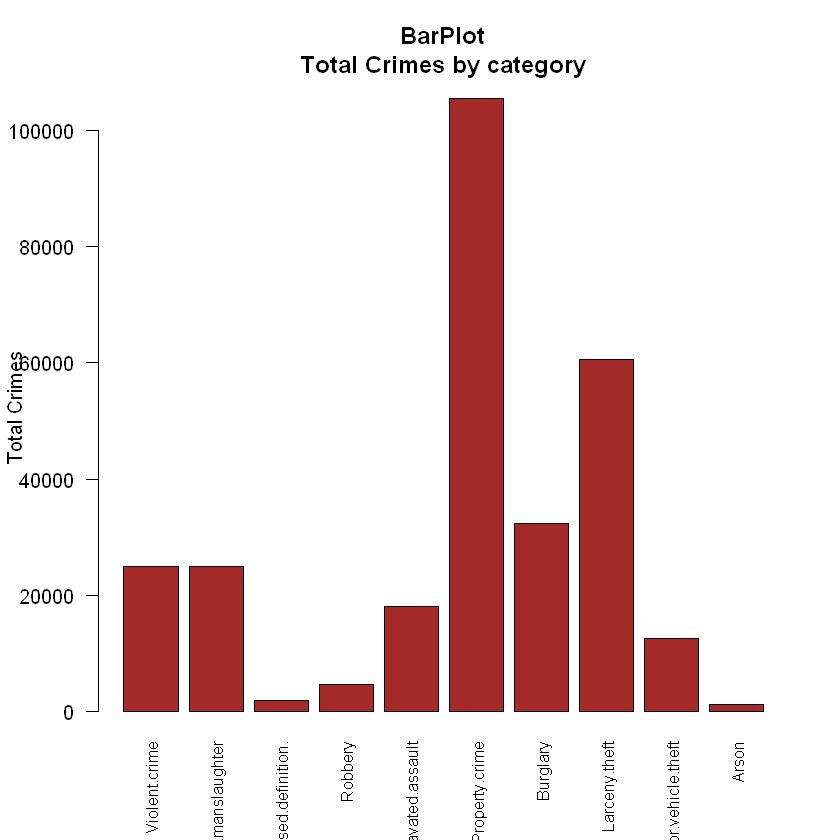

In [155]:
#Bar plot
barplot(total_by_crime_df$Total,names.arg = total_by_crime_df$Category,main = 'BarPlot\nTotal Crimes by category', 
        ylab = 'Total Crimes',las=2,col = 'brown', cex.names = 0.8)

# Pie Chart

In [123]:
#percentage
pct <- round((total_by_crime_df$Total/sum(total_by_crime_df$Total))*100,2)

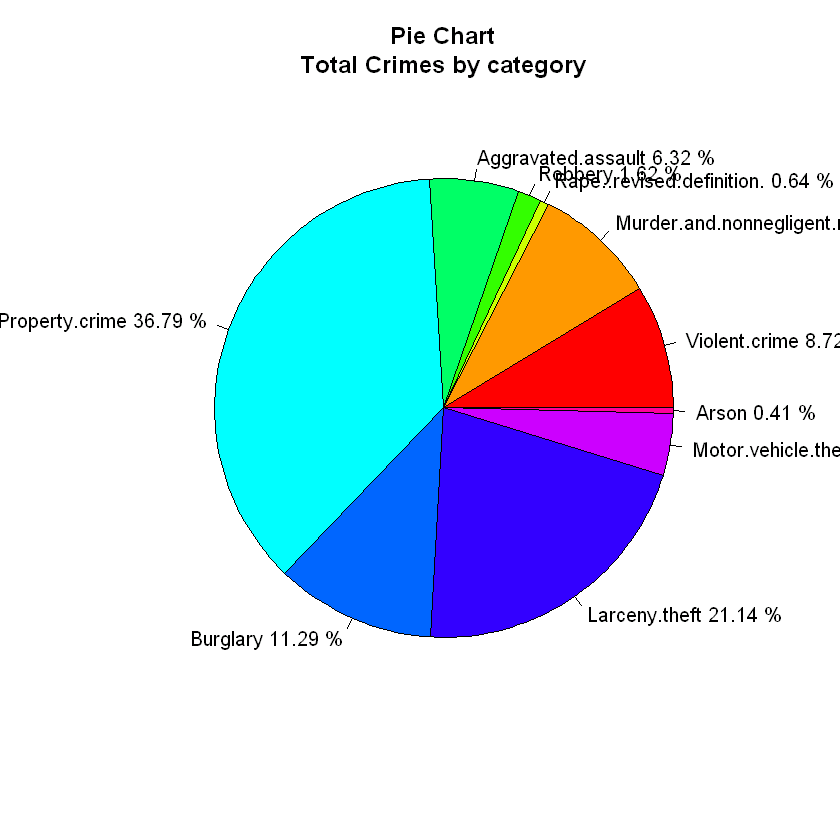

In [129]:
#Pie Chart
lbls <- total_by_crime_df$Category
lbls <- paste(lbls,pct)
lbls <- paste(lbls,"%")
pie(total_by_crime_df$Total, labels = lbls, main='Pie Chart\nTotal Crimes by category',
    col = rainbow(length(total_by_crime_df$Category)))

# Crime Analysis

In [131]:
#Keep only num Attributes
crimes_city <- offenses_city[,c(-1,-2)]
head(crimes_city)

,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,212,2,14,48,148,808,434,254,120,24
2,15,0,1,6,8,310,82,217,11,0
3,148,2,7,61,78,1819,228,1245,346,18
4,34,1,6,16,11,605,95,447,63,0
5,168,1,13,74,80,1929,305,1413,211,6
6,32,0,5,3,24,363,53,276,34,1


In [135]:
#Sum in each attribute for Total crimes
total_crimes_city <- colSums(crimes_city)
total_crimes_city

Violent.crime Murder.and.nonnegligent.manslaughter 
                              137347                                 1456 
           Rape..revised.definition.                              Robbery 
                               10673                                46918 
                  Aggravated.assault                       Property.crime 
                               78300                               882378 
                            Burglary                        Larceny.theft 
                              162229                               575940 
                 Motor.vehicle.theft                                Arson 
                              144209                                 6103

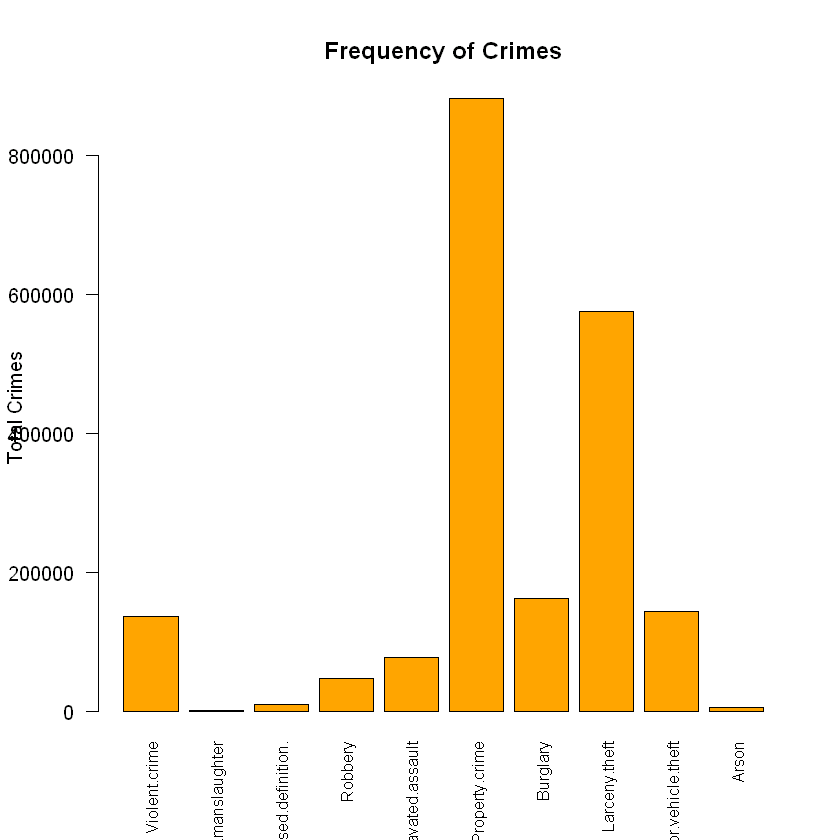

In [157]:
#Bar plot
barplot(total_crimes_city,main = 'Frequency of Crimes',ylab = 'Total Crimes',
        las=2,col = 'orange',cex.names = 0.8)

# Statistical Analysis - Correlation

In [139]:
crimes_county <- offenses_county[,c(-1,-2)]
head(crimes_county)

,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson,sum_crimes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,510,510,13,177,314,2077,463,985,629,11,11378
2,155,155,20,14,117,1422,708,693,21,0,6610
3,426,426,24,153,235,2013,660,1332,21,18,10616
4,252,252,46,32,165,2031,577,1412,42,4,9626
5,962,962,32,112,810,3810,1398,1838,574,145,21286
6,219,219,6,7,206,625,202,395,28,21,3856


In [141]:
cor_crimes_matrix <- round(cor(crimes_county),2)
cor_crimes_matrix

,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson,sum_crimes
Violent.crime,1.00,1.00,0.95,0.96,1.00,0.96,0.92,0.94,0.85,0.74,0.98
Murder.and.nonnegligent.manslaughter,1.00,1.00,0.95,0.96,1.00,0.96,0.92,0.94,0.85,0.74,0.98
Rape..revised.definition.,0.95,0.95,1.00,0.88,0.95,0.91,0.87,0.88,0.84,0.74,0.93
Robbery,0.96,0.96,0.88,1.00,0.93,0.92,0.89,0.93,0.74,0.60,0.94
Aggravated.assault,1.00,1.00,0.95,0.93,1.00,0.95,0.92,0.93,0.87,0.78,0.98
Property.crime,0.96,0.96,0.91,0.92,0.95,1.00,0.97,0.99,0.86,0.75,1.00
Burglary,0.92,0.92,0.87,0.89,0.92,0.97,1.00,0.97,0.76,0.76,0.97
Larceny.theft,0.94,0.94,0.88,0.93,0.93,0.99,0.97,1.00,0.79,0.68,0.98
Motor.vehicle.theft,0.85,0.85,0.84,0.74,0.87,0.86,0.76,0.79,1.00,0.79,0.87
Arson,0.74,0.74,0.74,0.60,0.78,0.75,0.76,0.68,0.79,1.00,0.76


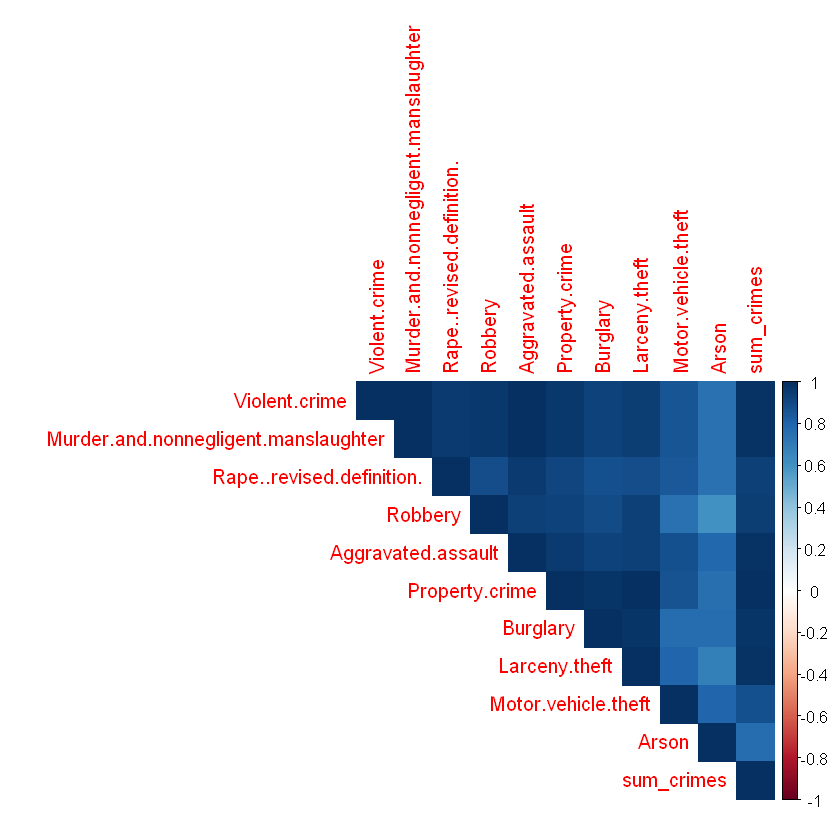

In [143]:
corrplot(cor_crimes_matrix, method = "color", type = "upper", tl.col = 'red')

# Train - Test data sets for NB classification

In [3]:
train <-  read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/train.csv")
head(train)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.4259,37.77460
2,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.4259,37.77460
3,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.4244,37.80041
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.4270,37.80087
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.4387,37.77154
6,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.4033,37.71343


In [5]:
test <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/test.csv")
head(test)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.3996,37.73505
2,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.3915,37.73243
3,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.4260,37.79221
4,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.4374,37.72141
5,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.4374,37.72141
6,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.4590,37.71317


In [7]:
train$DayOfWeek <- factor(train$DayOfWeek, levels = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))

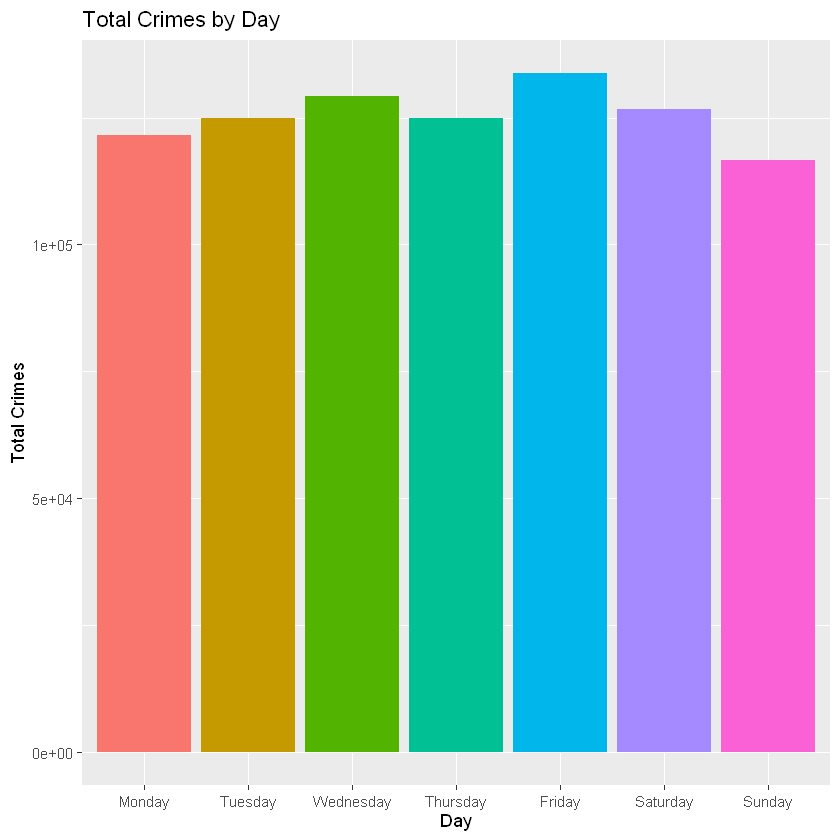

In [12]:
ggplot(train, aes(x= DayOfWeek, fill = DayOfWeek)) + 
  geom_bar() + labs(title = 'Total Crimes by Day', x = 'Day', y = 'Total Crimes') +
  theme(legend.position = 'none')

# FREQUENT TABLE

In [171]:
frequencies <- table(train$DayOfWeek)      
frequencies
#Data Frame creation
df_fr <- as.data.frame(frequencies)
colnames(df_fr) <- c('Day','Frequency')
#Relative Frequency
df_fr$Relative_Freq <- df_fr$Frequency/sum(df_fr$Frequency)
#Cumulative Frequency
df_fr$Cumulative_Freq <- cumsum(df_fr$Frequency)
#Relative Cumulative Frequency
df_fr$Relative_Cumulative_Freq <- df_fr$Cumulative_Freq/sum(df_fr$Frequency)
df_fr


   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   121584    124965    129211    125038    133734    126810    116707 

Day,Frequency,Relative_Freq,Cumulative_Freq,Relative_Cumulative_Freq
<fct>,<int>,<dbl>,<int>,<dbl>
Monday,121584,0.1384706,121584,0.1384706
Tuesday,124965,0.1423212,246549,0.2807918
Wednesday,129211,0.1471569,375760,0.4279488
Thursday,125038,0.1424044,500798,0.5703531
Friday,133734,0.1523081,634532,0.7226613
Saturday,126810,0.1444225,761342,0.8670837
Sunday,116707,0.1329163,878049,1.0000000


# CLASSIFICATION

In [16]:
#Encode DayOfWeek attribute in num
train$DayOfWeek <- as.character(train$DayOfWeek)
train$DayOfWeek[train$DayOfWeek == "Monday"] <- 1
train$DayOfWeek[train$DayOfWeek == "Tuesday"] <- 2
train$DayOfWeek[train$DayOfWeek == "Wednesday"] <- 3
train$DayOfWeek[train$DayOfWeek == "Thursday"] <- 4
train$DayOfWeek[train$DayOfWeek == "Friday"] <- 5
train$DayOfWeek[train$DayOfWeek == "Saturday"] <- 6
train$DayOfWeek[train$DayOfWeek == "Sunday"] <- 7
train$DayOfWeek <- as.numeric(train$DayOfWeek)
table(train$DayOfWeek)


     1      2      3      4      5      6      7 
121584 124965 129211 125038 133734 126810 116707 

In [18]:
#Encode PdDistrict attribute in num
train$PdDistrict[train$PdDistrict == "BAYVIEW"] <- 1
train$PdDistrict[train$PdDistrict == "CENTRAL"] <- 2
train$PdDistrict[train$PdDistrict == "INGLESIDE"] <- 3
train$PdDistrict[train$PdDistrict == "MISSION"] <- 4
train$PdDistrict[train$PdDistrict == "NORTHERN"] <- 5
train$PdDistrict[train$PdDistrict == "PARK"] <- 6
train$PdDistrict[train$PdDistrict == "RICHMOND"] <- 7
train$PdDistrict[train$PdDistrict == "SOUTHERN"] <- 8
train$PdDistrict[train$PdDistrict == "TARAVAL"] <- 9
train$PdDistrict[train$PdDistrict == "TENDERLOIN"] <- 10
train$PdDistrict <- as.numeric(train$PdDistrict)
table(train$PdDistrict)


     1      2      3      4      5      6      7      8      9     10 
 89431  85460  78845 119908 105296  49313  45209 157182  65596  81809 

In [20]:
#Change Label attribute in factor
train$Category <- as.factor(train$Category)

In [24]:
#Delete lines where Hour has NA values
train <- train[!is.na(train$Dates), ]
sum(is.na(train$Hour))
train$Dates <- as.POSIXct(train$Dates, format = "%Y-%m-%d %H:%M:%S")
train$Hour <- as.numeric(format(train$Dates, "%H"))
head(train$Hour)

[1] 0

[1] 23 23 23 23 23 23

In [26]:
sum(is.na(train$Month))
train$Month <- as.numeric(format(train$Dates, "%m"))

[1] 0

In [32]:
#Selection of 3 isomeric variables LIQUOR LAWS (1903 observations), RUNAWAY (1946 observations), KIDNAPPING (2341 observations)
table(train$Category)
choose_categories <- c('LIQUOR LAWS','RUNAWAY','KIDNAPPING')
head(choose_categories)


                      ARSON                     ASSAULT 
                       1513                       76864 
                 BAD CHECKS                     BRIBERY 
                        406                         289 
                   BURGLARY          DISORDERLY CONDUCT 
                      36753                        4320 
DRIVING UNDER THE INFLUENCE               DRUG/NARCOTIC 
                       2268                       53971 
                DRUNKENNESS                EMBEZZLEMENT 
                       4280                        1166 
                  EXTORTION             FAMILY OFFENSES 
                        256                         491 
     FORGERY/COUNTERFEITING                       FRAUD 
                      10609                       16679 
                   GAMBLING                  KIDNAPPING 
                        146                        2341 
              LARCENY/THEFT                 LIQUOR LAWS 
                     174896   

[1] "LIQUOR LAWS" "RUNAWAY"     "KIDNAPPING"

In [34]:
#Keep only the lines of these 3 classes
choose_train <- train[train$Category %in% choose_categories,]
choose_train$Category <-factor(choose_train$Category)

In [36]:
#Drop remaining levels
choose_train$Category <- droplevels(choose_train$Category)

In [40]:
#We check if they are uniformly distributed 
prop.table(table(choose_train$Category))
#Kidnapping value is higher but not enough to have a bias


 KIDNAPPING LIQUOR LAWS     RUNAWAY 
  0.3781906   0.3074313   0.3143780 

In [42]:
choose_train_df_ready <- data.frame(DayOfWeek = choose_train$DayOfWeek,
                             PdDistrict = choose_train$PdDistrict,
                             X =choose_train$X,
                             Y= choose_train$Y,
                             Hour = choose_train$Hour,
                             Month = choose_train$Month,
                             Category = choose_train$Category)
head(choose_train_df_ready)
                             

,DayOfWeek,PdDistrict,X,Y,Hour,Month,Category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3,3,-122.4243,37.74505,12,5,KIDNAPPING
2,3,3,-122.4497,37.70976,9,5,RUNAWAY
3,3,8,-122.4197,37.77468,4,5,KIDNAPPING
4,2,2,-122.4039,37.79054,22,5,KIDNAPPING
5,1,3,-122.4262,37.71002,16,5,KIDNAPPING
6,1,7,-122.4585,37.78380,11,5,RUNAWAY


In [48]:
#Split data set for classification
set.seed(123)
split_category <- sample.split(choose_train_df_ready$Category, SplitRatio = 0.8)
head(split_category)
prop.table(table(split_category))

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE

split_category
FALSE  TRUE 
  0.2   0.8 

In [50]:
#For train lines where are TRUE, for test lines where are FALSE
train_subset <- subset(choose_train_df_ready, split_category == "TRUE")
test_subset <- subset(choose_train_df_ready, split_category == "FALSE")

In [52]:
#Training data and Label only from train_subset to avoid overfitting
train_data_crime <- train_subset[,-7]
train_label_crime <- train_subset$Category

In [58]:
#Creation of model with NB method and cross validation = 10
model2 = train(train_data_crime,train_label_crime,'nb',trControl=trainControl(method='cv',number=10))
model2

Naive Bayes 

4952 samples
   6 predictor
   3 classes: 'KIDNAPPING', 'LIQUOR LAWS', 'RUNAWAY' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4457, 4457, 4456, 4456, 4457, 4457, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.4337650  0.1505203
   TRUE      0.5395772  0.3119445

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

In [60]:
#We provide the remaining data from the 20% holdout set that the model hasn't seen during training
PredictCrime <- predict(model2,newdata = test_subset)
head(PredictCrime)
head(test_subset$Category)
confusionMatrix(PredictCrime,test_subset$Category)

[1] KIDNAPPING  RUNAWAY     KIDNAPPING  KIDNAPPING  LIQUOR LAWS LIQUOR LAWS
Levels: KIDNAPPING LIQUOR LAWS RUNAWAY

[1] KIDNAPPING RUNAWAY    KIDNAPPING KIDNAPPING KIDNAPPING KIDNAPPING
Levels: KIDNAPPING LIQUOR LAWS RUNAWAY

Confusion Matrix and Statistics

             Reference
Prediction    KIDNAPPING LIQUOR LAWS RUNAWAY
  KIDNAPPING         231          76      65
  LIQUOR LAWS        144         240      67
  RUNAWAY             93          65     257

Overall Statistics
                                        
               Accuracy : 0.588         
                 95% CI : (0.56, 0.6156)
    No Information Rate : 0.378         
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.3842        
                                        
 Mcnemar's Test P-Value : 9.489e-06     

Statistics by Class:

                     Class: KIDNAPPING Class: LIQUOR LAWS Class: RUNAWAY
Sensitivity                     0.4936             0.6299         0.6607
Specificity                     0.8169             0.7538         0.8139
Pos Pred Value                  0.6210             0.5322         0.6193
Neg Pred Value                  0.7263             0.8208   